In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('permintaan.csv', parse_dates=['tanggal'], dayfirst=True)
df.head()

,instansi,tanggal,komponen,golda,jumlah
0,RSU. DR. M. Djamil,2020-01-02,WE,O,2
1,RSU. DR. M. Djamil,2020-08-14,TC,O,3
2,RSU. DR. M. Djamil,2020-10-26,PRC,A,1
3,RSU. DR. M. Djamil,2021-01-12,PRC,AB,1
4,RSU. DR. M. Djamil,2021-03-13,WB,O,2


In [ ]:
df = df.drop(columns=['instansi', 'komponen', 'golda'])
df.head()

,tanggal,jumlah
0,2020-01-02,2
1,2020-08-14,3
2,2020-10-26,1
3,2021-01-12,1
4,2021-03-13,2


In [ ]:
# Konversi kolom tanggal ke tipe datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)

In [ ]:
df = df.sort_values(by='tanggal')


In [ ]:
# Step 2: Menghitung Simple Moving Average (SMA)
window_size = 29  # Misalnya, menggunakan jendela SMA 6 bulan
df['SMA'] = df['jumlah'].rolling(window=window_size).mean()

In [ ]:
# Step 3: Forecasting 6 bulan ke depan menggunakan nilai SMA terakhir
last_sma = df['SMA'].iloc[-1]
forecast_period = 6
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='M')
forecast = pd.DataFrame({'tanggal': future_dates, 'jumlah': last_sma})
forecast.set_index('tanggal', inplace=True)

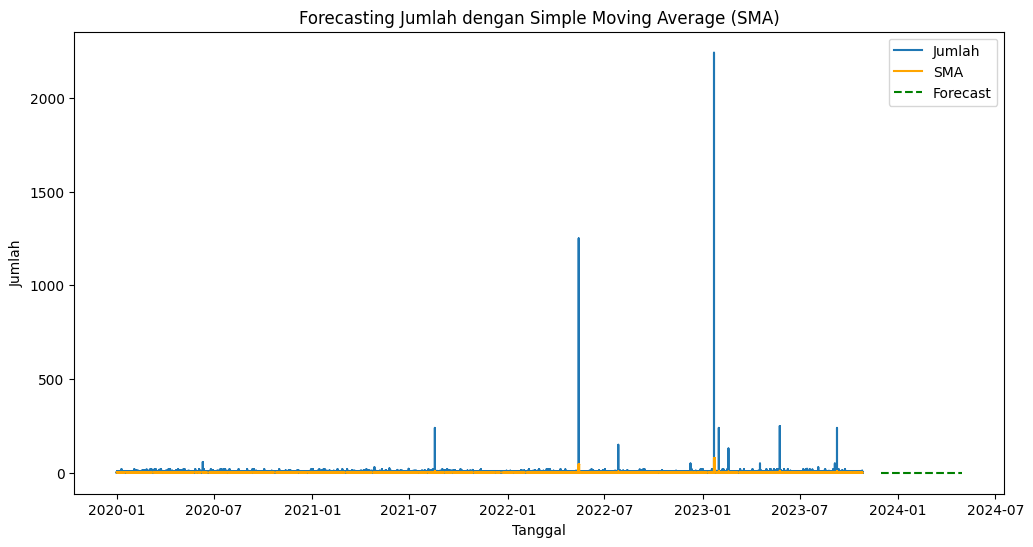

In [ ]:
# Step 4: Visualisasi data dan hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(df['jumlah'], label='Jumlah')
plt.plot(df['SMA'], label='SMA', color='orange')
plt.plot(forecast, label='Forecast', linestyle='--', color='green')
plt.title('Forecasting Jumlah dengan Simple Moving Average (SMA)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

In [ ]:
# Menampilkan hasil akhir data dan prediksi
print(df.tail(10))  # Menampilkan 10 baris terakhir data historis
print(forecast)  # Menampilkan hasil prediksi 6 bulan ke depan

            jumlah       SMA
tanggal                     
2023-10-27       1  1.827586
2023-10-27       4  1.896552
2023-10-27       3  1.965517
2023-10-27       1  1.965517
2023-10-27       2  2.000000
2023-10-27       3  2.034483
2023-10-27       2  2.034483
2023-10-27       2  2.068966
2023-10-27       1  2.068966
2023-10-27       1  2.000000
            jumlah
tanggal           
2023-11-30     2.0
2023-12-31     2.0
2024-01-31     2.0
2024-02-29     2.0
2024-03-31     2.0
2024-04-30     2.0


In [ ]:
# Step 5: Evaluasi (contoh sederhana dengan MAE)
from sklearn.metrics import mean_absolute_error

# Ambil data untuk evaluasi (misalnya 6 bulan terakhir)
last_six_months = df.iloc[-6*window_size:]
y_true = last_six_months['jumlah']
y_pred = last_six_months['SMA']

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE dari model SMA 6 bulan: {mae}')

MAE dari model SMA 6 bulan: 1.6254458977407846
